## Einführung in die Finite-Differenzen-Methode

Die Finite-Differenzen-Methode (FDM) ist neben der Finite-Volumen-Methode (FVM) das am häufigsten in der Strömungssimulation eingesetzte Lösungsverfahren.

Als einfaches Beispiel zur Einführung des Verfahrens dient eine ebene, druckgradient getriebene Poiseuille-Strömung zwischen zwei parallelen Platten (Spaltströmung):

![](Poiseuille.pdf)

Für diesen Fall vereinfacht sich die Navier-Stokes-Gleichung zu folgender Differentialgleichung:

$$\frac{\text{d}^2 u}{\text{d}y^2} = \frac{1}{\mu}\frac{\text{d}p}{\text{d}x}$$

mit der Viskosität $\mu$ und den Randwerten $u(y=0) = 0$ und $u(y=H) = 0$, d.h. mit der Haftbedingung an den Wänden.
d
Für das Beispiel verwenden wir einen Plattenabstand $H = 0,1$, eine Viskosität $\mu = 5$ und einen Druckgradienten $\text{d}p/\text{d}x = -200$.

### Das Finite-Differenzen-Verfahren

Ziel des Finite-Differenzen-Verfahrens ist die Überführung der (partiellen) Differentialgleichung bzw. des DGL-Systems in ein algebraisches Gleichungssystem. Das Verfahren berechnet für diskrete Werte der unabhängigen Variablen (in unserem Beispiel die Koordinate $y$) diskrete angenäherte Werte für die gesuchte Funktion.

#### Berechnung der Ableitungen

Die in der Differentialgleichung auftretenden Ableitungen müssen also zunächst in algebraische Ausdrücke überführt werden. Hierzu bietet sich eine Taylorreihenentwicklung der gesuchten Funktion an. Kennt man den Funktionswert $f(x)$ an der Stelle $x$, so lässt sich der dieser auch an den Stellen $x+\Delta x$ und $x-\Delta x$ mit einer Taylorreihe berechnen:

$$f(x+\Delta x) = f(x) + \frac{\Delta x}{1!}f'(x) + \frac{\Delta x^2}{2!}f''(x) + \dots$$
$$f(x-\Delta x) = f(x) - \frac{\Delta x}{1!}f'(x) + \frac{\Delta x^2}{2!}f''(x) - \dots$$

Löst man die erste der beiden Taylorreihen nach $f'(x)$ auf, erhält man den Ausdruck

$$f'(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} - \frac{\Delta x}{2!}f''(x) - \dots$$

Bzw. bei Abbruch der Taylorreihe nach dem zweiten Glied ergibt sich der *rechtsseitige Differenzenquotient* mit der Fehlerordnung $\mathcal O(\Delta x)$:

$$f'(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} + \mathcal O(\Delta x)$$

Auf die gleiche Weise, aber mit der zweiten Taylorreihe von oben ergibt sich der *linksseitige Differenzenquotient* mit derselben Fehlerordnung:

$$f'(x) = \frac{f(x)-f(x-\Delta x)}{\Delta x} + \mathcal O(\Delta x)$$

Eine genauere Formulierung mit der Fehlerordnung $\mathcal O(\Delta x^2)$ erhält man mit dem *zentralen Differenzenquotienten*, der sich durch die Subtraktion der beiden Taylorreihen ergibt:

$$f'(x) = \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x} + \mathcal O(\Delta x^2)$$

Im Beispiel oben wird auch die zweite Ableitung benötigt. Der zentrale Differenzenquotient für die zweite Ableitung ergibt sich aus der Addition der beiden Taylorreihen von oben:

$$f''(x) = \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x)}{\Delta x^2} + \mathcal O(\Delta x^2)$$

Höhere Ableitungen lassen sich auf die gleiche Weise durch Addition oder Subtraktion der beiden Taylorreihen mit entsprechend vielen Gliedern höherer Ordnung finden.

#### Diskretisierung

Um zur Finite-Differenzen-Formulierung zu kommen, wird das Rechengebiet (in unserem Fall die Strecke zwischen unterer und oberer Platte des Kanals) in $N$ einzelne Punkte zerlegt. Die Punkte können äquidistant oder beliebig angeordnet werden und die Diskretisierung kann natürlich auch in der Fläche (2D) oder im Raum (3D) erfolgen. Zur Demonstration des Verfahrens wählen wir der Einfachheit halber eine äquidistante eindimensionale Verteilung.

![](Poiseuille_diskret.pdf)

Für jeden der inneren Gitterpunkte (hier $i = 1 \dots 3$) muss die Differentialgleichung für die Poiseuille-Strömung

$$\frac{\text{d}^2 u}{\text{d}y^2} = \frac{1}{\mu}\frac{\text{d}p}{\text{d}x}$$

erfüllt sein. Mithilfe des Differenzenquotienten für die zweite Ableitung lässt sich dann die folgende algebraische Gleichung formulieren:

$$\frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta y^2} = \frac{1}{\mu}\frac{\text{d}p}{\text{d}x} \qquad \text{für} \qquad i=1 \dots N-1$$

bzw. durch Umstellen:

$$-u_{i-1} + 2 u_i - u_{i+1} = -\Delta y^2 \cdot \frac{1}{\mu}\frac{\text{d}p}{\text{d}x}\qquad \text{für} \qquad i=1 \dots N-1$$

##### Dirichlet-Randbedingung (Vorgabe des Funktionswerts am Rand)

In unserem Beispiel sind die Werte der Geschwindigkeit am oberen ($u_N$) und unteren ($u_0$) Rand gegeben. Man spricht in diesem Fall von sog. Dirichlet-Randbedingungen. Die Gleichung für den ersten Punkt im Strömungsgebiet ($i=1$) wird damit zu:

$$-u_0 + 2 u_1 - u_2 = -\Delta y^2 \cdot \frac{1}{\mu}\frac{\text{d}p}{\text{d}x}$$

wobei die bekannten Größen auf die rechte Seite geschrieben werden:

$$2 u_1 - u_2 = -\Delta y^2 \cdot \frac{1}{\mu}\frac{\text{d}p}{\text{d}x} + u_0$$

Die gleiche Vorgehensweise führt zur Gleichung für den Gitterpunkt an der Stelle $N-1$:

$$-u_{N-2} + 2 u_{N-1}  = -\Delta y^2 \cdot \frac{1}{\mu}\frac{\text{d}p}{\text{d}x} + u_{N}$$

Auch andere Randbedingungen, wie z.B. die Vorgabe eines Geschwindigkeitsgradienten an der Wand (Neumann-Randbedingung) oder die Vorgabe einer Symmetrie sind möglich. Dazu gleich mehr.

##### Lineares Gleichungssystem

Zunächst sollen die algebraischen Gleichungen für jeden Gitterpunkt jedoch in einer Matrix-Vektor-Form dargestellt werden. Mit dem Quellterm $s_i = -\frac{1}{\mu}\frac{\text{d}p}{\text{d}x}$ ergibt sich dann das lineare Gleichungssystem:

$$
\underbrace{
    \begin{pmatrix}
     2      & -1     &  0     & \dots  \\
    -1      &  2     & \ddots & 0      \\
     0      & \ddots & \ddots & -1     \\
     \vdots &  0     & -1     & 2      \\
    \end{pmatrix}
}_{\text{Koeffizientenmatrix}}
\underbrace{
    \begin{pmatrix}
    u_1 \vphantom{\dots} \\
    u_2 \vphantom{\ddots} \\
    \vdots \vphantom{\ddots} \\
    u_{N-1} \vphantom{\vdots}
    \end{pmatrix}
}_{\text{Lösungsvektor}}
=
\underbrace{
    \begin{pmatrix}
    \Delta y^2 \cdot s_1 + u_0 \vphantom{\dots}\\
    \Delta y^2 \cdot s_2 \vphantom{\ddots} \\
    \vdots \vphantom{\ddots} \\
    \Delta y^2 \cdot s_{N-1} + u_N \vphantom{\vdots}
    \end{pmatrix}
}_{\text{Quellvektor}}
$$ 

##### Neumann-Randbedingung (Vorgabe des Gradienten an der Wand)

Eine weitere mögliche Randbedingung wäre die Vorgabe der Schubspannung an der Wand ($\tau_w$, hier für den unteren Rand) anstatt der Geschwindigkeit. Mit dem [Newton'schen Schubspannungsansatz](https://de.wikipedia.org/wiki/Newtonsches_Fluid) ist

$$\tau_w = \mu \frac{\text{d}u}{\text{d}y}\bigg|_w $$

bzw. durch Umstellung und unter Verwendung des zentralen Differenzenquotienten und des fiktiven Punktes bei $i=-1$:

![](Poiseuille_Neumann.pdf)

$$\frac{\text{d}u}{\text{d}y}\bigg|_w \approx \frac{u_1-u_{-1}}{2\Delta y} = \frac{\tau_w}{\mu}$$

Da in der Gleichung die Geschwindigkeit an der Wand $u_0$ nicht vorkommt und diese aber unbekannt ist, muss nach dem oben gezeigten Schema auch eine algebraische Gleichung für $i=0$ aufgestellt werden:

$$\frac{u_{-1} - 2 u_0 + u_{1}}{\Delta y^2} = \frac{1}{\mu}\frac{\text{d}p}{\text{d}x}$$

Auflösen der vorletzten Gleichung nach $u_{-1}$ und Einsetzen in die letzte Gleichung ergibt:

$$2 u_0 - 2 u_1 = -\Delta y^2 \cdot \frac{1}{\mu} \frac{\text{d}p}{\text{d}x} - \Delta y \cdot \frac{2 \tau_w}{\mu}$$

Als Gleichungssystem ergibt sich nun, wenn wir nur den unteren Rand gegen eine Neumann-Randbedingung tauschen:

$$\begin{pmatrix}
      2    & -2      & 0      &        &        \\
     -1    &  2      & -1     & \ddots &        \\
      0    & -1      &  2     & \ddots & 0      \\
           & \ddots  & \ddots & \ddots & -1     \\
           &         &  0     & -1     & 2      \\
\end{pmatrix}
\begin{pmatrix}
    u_0 \vphantom{\dots} \\
    u_1 \vphantom{\dots} \\
    u_2 \vphantom{\ddots} \\
    \vdots \vphantom{\ddots} \\
    u_{N-1} \vphantom{\vdots}
\end{pmatrix}
=
\begin{pmatrix}
        \Delta y^2 \cdot s_0 - \Delta y \cdot 2 \tau_w / \mu\\
        \Delta y^2 \cdot s_1 \\
        \vdots  \\
        \vdots  \\
        \Delta y^2 \cdot s_{N-1} + u_N \vphantom{\vdots}
\end{pmatrix}$$ 

Die Matrix-Vektor-Gleichung hat also einen zusätzlichen Eintrag aufgrund der Neumann-Randbedingung.

#### Lösung des Gleichungssystems

Bei der Diskretisierung vieler Transportgleichungen ([Wärmeleitungsgleichung](https://de.wikipedia.org/wiki/Wärmeleitungsgleichung), [Konvektions-Diffusions-Gleichung](https://de.wikipedia.org/wiki/Konvektions-Diffusions-Gleichung) oder unser obiges Beispiel) resultiert eine schwach besetzte Koeffizientenmatrix. D.h. ein Großteil der Koeffizienten ist Null. In vielen Fällen sind sogar nur die drei mittleren Diagonalen mit Werten ungleich Null besetzt. Man spricht dann von einer [Tridiagonalmatrix](https://de.wikipedia.org/wiki/Tridiagonalmatrix).  


##### Der Thomas-Algorithmus (Tridiagonalmatrix-Algorithmus - TDMA)

Entspricht die Koeffizientenmatrix einer Tridiagonalmatrix,

$$\begin{pmatrix}
     b_1    &  c_1      & 0      &        &        \\
     a_2    &  b_2      & c_2     & \ddots &        \\
      0    & a_3      &  b_3     & \ddots & 0      \\
           & \ddots  & \ddots & \ddots & c_{N-1}     \\
           &         &  0     & a_n     & b_n      \\
\end{pmatrix}
\begin{pmatrix}
    u_0 \vphantom{\dots} \\
    u_1 \vphantom{\dots} \\
    u_2 \vphantom{\ddots} \\
    \vdots \vphantom{\ddots} \\
    u_{n-1} \vphantom{\vdots}
\end{pmatrix}
=
\begin{pmatrix}
        d_1 \\
        d_2 \\
        d_3  \\
        \vdots  \\
        d_n
\end{pmatrix}$$ 

kann ein sehr effizientes direktes (d.h. nicht iteratives) Lösungsverfahren, der sog. [Thomas-Algorithmus](https://de.wikipedia.org/wiki/Thomas-Algorithmus), verwendet werden.

Der Algorithmus besteht aus zwei Schleifendurchläufen. In einem ersten werden die Koeffizienten wie folgt modifiziert:

$$c_i' = 
\begin{cases}
\frac{c_1}{b_1} & i = 1 \\
\frac{c_i}{b_i - c_{i-1}' a_i} & i = 2, \dots, n-1
\end{cases}$$

$$d_i' = 
\begin{cases}
\frac{d_1}{b_1} & i = 1 \\
\frac{d_i-d_{i-1}' a_i}{b_i - c_{i-1}' a_i} & i = 2, \dots, n
\end{cases}$$

In einem zweiten Durchlauf, der rückwärts erfolgt, ergibt sich die Lösung durch:

$$u_i = 
\begin{cases}
d_n' & i = n \\
d_i' - c_i' u_{i+1} & i = n-1, n-2, \dots, 1
\end{cases}$$

#### Implementierung in Python

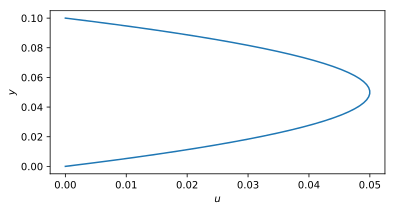

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Randwerte (hier nur Dirichlet-Randbedingung)
u1_0 = 0.0
u1_H = 0.0
H    = 0.1
mu = 5.0
dpdx = -200.0

# Anzahl Diskretisierungspunkte
N    = 50

# diskrete y-Werte (N über die Spalthöhe)
yi2 = np.linspace(0, H, num=N)
delta_y = yi2[1] - yi2[0]

# Koeffizientenmatrix:
ai = np.full_like(yi2, -1)
bi = np.full_like(yi2, 2)
ci = np.full_like(yi2, -1)

# Quellvektor
si = -delta_y**2 * dpdx/mu
di = np.full_like(yi2, si)
di[1] += u1_0
di[-2] += u1_H

# Lösungsvektor
ui = np.zeros_like(yi2)
ui[0] = u1_0
ui[-1] = u1_H

def TDMA(a, b, c, d, u):
    c_strich = np.empty_like(c)
    d_strich = np.empty_like(d)
    
    # Vorwärtsschleife
    c_strich[1] = c[1]/b[1]
    d_strich[1] = d[1]/b[1]
    for i in range(2, np.size(c)-1):
        c_strich[i] = c[i] / (b[i] - c_strich[i-1] * a[i])
        d_strich[i] = (d[i] - d_strich[i-1] * a[i]) / (b[i] - c_strich[i-1] * a[i])
    
    # Rückwärtsschleife
    u[-2] = d_strich[-2]
    for i in range(np.size(c)-3, 0, -1):
        u[i] = d_strich[i] - c_strich[i] * u[i+1]

TDMA(ai, bi, ci, di, ui)

plt.figure(figsize=(6, 3))
plt.plot(ui, yi2, label='FDM')
plt.xlabel('$u$')
plt.ylabel('$y$')
plt.show();

Nicht in allen Fällen ist die aus der Diskretisierung resultierende Koeffizientenmatrix in der Tridiagonalform. Dann müssen andere, iterative Lösungsverfahren, wie z.B. das [Gauß-Seidel-Verfahren](https://de.wikipedia.org/wiki/Gauß-Seidel-Verfahren) eingesetzt werden, auf die im Rahmen der Vorlesung jedoch nicht näher eingegangen wird.

Im nächsten Notebook kehren wir zurück zu unserer eigentlichen Aufgabe, der Lösung der Navier-Stokes-Gleichungen. Zunächst betrachten wir dort allerdings nur den [konvektiven Transport](TFD - 3.5 Kontinuumsstroemungen - Konvektion.ipynb).


---
###### Copyright (c) 2017, Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()